# MOBILE PRICE CLASSIFICATION

A mobile phone, cell phone, cellphone, or hand phone, sometimes shortened to simply mobile, cell or just phone, is a portable telephone that can make and receive calls over a radio frequency link while the user is moving within a telephone service area. 

The first handheld mobile phone was demonstrated by John F. Mitchell and Martin Cooper of Motorola in 1973, using a handset weighing c. 2 kilograms (4.4 lbs). 

In 1979, Nippon Telegraph and Telephone (NTT) launched the world's first cellular network in Japan. In 1983, the DynaTAC 8000x was the first commercially available handheld mobile phone. From 1983 to 2014, worldwide mobile phone subscriptions grew to over seven billion—enough to provide one for every person on Earth. 

In first quarter of 2016, the top smartphone developers worldwide were Samsung, Apple, and Huawei, and smartphone sales represented 78 percent of total mobile phone sales. For feature phones (or "dumbphones") as of 2016, the largest were Samsung, Nokia, and Alcatel.

source:https://en.wikipedia.org/wiki/Mobile_phone

Evolution of Mobile Phone (Dimension and Weight)
 
 
![](https://s3b.cashify.in/blog/wp-content/uploads/2018/05/mobile-phone-evolution.jpg)

In this kernel, we have analyzed mobile phone features with price range. Also I build a model using support vector machine algortihm.

### CONTENTS:

1. [Feature Explanation]


2. [Read Data]:


3. [Exploratory Data Analysis]
            * [Data Type Conversion]
            * [Data Summary]
            * [Missing Value Check]
            * [Correlation between the features]
            * [EDA through Visualizations]
            * [4G-RAM and Price Range]
            * [NUMBER OF CORES OF PROCESOR(n_cores)- RAM and PRICE RANGE]
            * [Primary Camera mega pixels(pc) - RAM and Price Range]
            * [Front Camera mega pixels(fc) - RAM and Price Range]
            * [Weight of mobile phone(mobile_wt)- RAM and Price Range]
            * [WIFI-RAM and PRICE RANGE]
            * [DUAL SIM- RAM AND PRICE RANGE]
            * [Screen Height of mobile(sc_h) AND Screen Width of mobile(sc_w)- RAM and Price Range]
            

3. [Model Building]:
     * [Logistic Regression]
     * [Naive Bayes]
     * [Regularization]
     * [KNN]
     * [Decision Trees]
     * [Support Vector Machines]
     * [Ensembles -> Random Forest]
     
4. [Selection of the Best Features using RFE and Random Forest]

5. [Models Evaluation]

## Feature Explanation

*Dataset as 21 features and 2000 entries. The meanings of the features are given below.*  
---
**battery_power:** Total energy a battery can store in one time measured in mAh

**blue:** Has bluetooth or not

**clock_speed:** speed at which microprocessor executes instructions

**dual_sim:** Has dual sim support or not

**fc:** Front  Camera mega pixels

**four_g:** Has 4G or not

**int_memory:** Internal Memory in Gigabytes

**m_dep:** Mobile Depth in cm

**mobile_wt:** Weight of mobile phone

**n_cores:** Number of cores of processor

**pc:** Primary Camera mega pixels

**px_height:** Pixel Resolution Height

**px_width:** Pixel Resolution Width

**ram:** Random Access Memory in Mega Bytes

**sc_h:** Screen Height of mobile in cm

**sc_w:** Screen Width of mobile in cm

**talk_time:** longest time that a single battery charge will last

**three_g:** Has 3G or not

**touch_screen:** Has touch screen or not

**wifi:** Has wifi or not

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

---
# 1) Importing the required modules

In [1]:
# Libraries
import numpy as np
import pandas as pd
import pickle
import os

# Additional Options
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_columns', 100)

---
# 2) Reading the Data

In [2]:
proj_fol = os.getcwd()

In [3]:
train_data = pd.read_csv(proj_fol+'/data/train.csv')
test_data = pd.read_csv(proj_fol+'/data/test.csv')

---
# 3) Data Analysis

## 3(a) - Data Type Conversion -> Based on Data Understanding and general domain intuition

In [4]:
for i in ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']:
    train_data[i] = train_data[i].astype('category')
    test_data[i] = test_data[i].astype('category')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int64   
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int64   
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   category
 10  pc             2000 non-null   int64   
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int64   
 15  sc_w           2000 non-null   int64   
 16  talk_time      2000 non-null   int64   
 17  three_g        2000 non-null   ca

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  1000 non-null   int64   
 1   blue           1000 non-null   category
 2   clock_speed    1000 non-null   float64 
 3   dual_sim       1000 non-null   category
 4   fc             1000 non-null   int64   
 5   four_g         1000 non-null   category
 6   int_memory     1000 non-null   int64   
 7   m_dep          1000 non-null   float64 
 8   mobile_wt      1000 non-null   int64   
 9   n_cores        1000 non-null   category
 10  pc             1000 non-null   int64   
 11  px_height      1000 non-null   int64   
 12  px_width       1000 non-null   int64   
 13  ram            1000 non-null   int64   
 14  sc_h           1000 non-null   int64   
 15  sc_w           1000 non-null   int64   
 16  talk_time      1000 non-null   int64   
 17  three_g        1000 non-null   cat

In [7]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## 3(b) - Summary of the Data

In [8]:
train_data.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0,2000.000000,2000.0,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.0,2000.0,2000.0
unique,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,4.0
top,NaN,0.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
freq,NaN,1010.0,NaN,1019.0,NaN,1043.0,NaN,NaN,NaN,274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1523.0,1006.0,1014.0,500.0
mean,1238.518500,NaN,1.522250,NaN,4.309500,NaN,32.046500,0.501750,140.249000,NaN,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,NaN,NaN,NaN,NaN
std,439.418206,NaN,0.816004,NaN,4.341444,NaN,18.145715,0.288416,35.399655,NaN,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,NaN,NaN,NaN,NaN
min,501.000000,NaN,0.500000,NaN,0.000000,NaN,2.000000,0.100000,80.000000,NaN,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
25%,851.750000,NaN,0.700000,NaN,1.000000,NaN,16.000000,0.200000,109.000000,NaN,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,NaN,NaN,NaN,NaN
50%,1226.000000,NaN,1.500000,NaN,3.000000,NaN,32.000000,0.500000,141.000000,NaN,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,NaN,NaN,NaN,NaN
75%,1615.250000,NaN,2.200000,NaN,7.000000,NaN,48.000000,0.800000,170.000000,NaN,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,NaN,NaN,NaN,NaN


In [9]:
test_data.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0
unique,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,4.0
top,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0
freq,NaN,516.0,NaN,517.0,NaN,513.0,NaN,NaN,NaN,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,756.0,500.0,507.0,260.0
mean,1248.510000,NaN,1.540900,NaN,4.593000,NaN,33.652000,0.517500,139.51100,NaN,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,NaN,NaN,NaN,NaN
std,432.458227,NaN,0.829268,NaN,4.463325,NaN,18.128694,0.280861,34.85155,NaN,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,NaN,NaN,NaN,NaN
min,500.000000,NaN,0.500000,NaN,0.000000,NaN,2.000000,0.100000,80.00000,NaN,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
25%,895.000000,NaN,0.700000,NaN,1.000000,NaN,18.000000,0.300000,109.75000,NaN,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,NaN,NaN,NaN,NaN
50%,1246.500000,NaN,1.500000,NaN,3.000000,NaN,34.500000,0.500000,139.00000,NaN,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,NaN,NaN,NaN,NaN
75%,1629.250000,NaN,2.300000,NaN,7.000000,NaN,49.000000,0.800000,170.00000,NaN,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,NaN,NaN,NaN,NaN


#### Insight of the describe function
It shows the dataset has no much skewness in the train and test split

## 3(c) - Missing value check

In [10]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
test_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Another way of viewing the missing data

TRAIN DATA


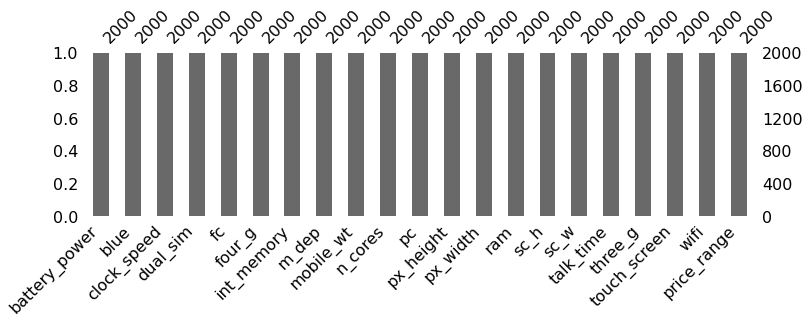

In [12]:
import missingno as msno
import matplotlib.pyplot as plt
print("TRAIN DATA")
msno.bar(train_data, figsize=(12,3))
# plt.figure(figsize=(0.1,0.1))
plt.show()

TEST DATA


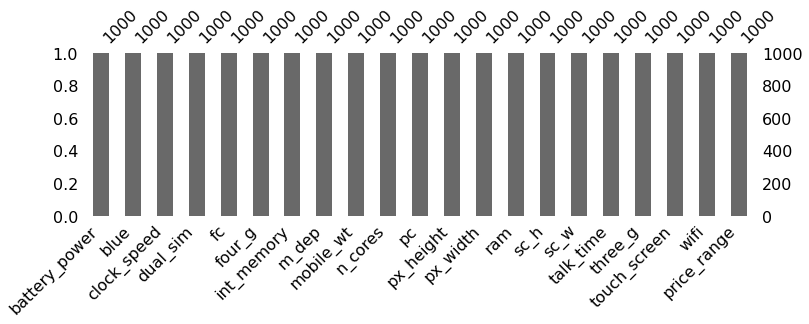

In [13]:
print("TEST DATA")
msno.bar(test_data, figsize=(12, 3))
plt.show()

# 3(d) Feature Engineering

In [14]:
# Screen Size (Inches)
train_data['screen_size_inch'] = train_data['sc_h']*train_data['sc_w']
test_data['screen_size_inch'] = test_data['sc_h']*test_data['sc_w']

# Pixels Per Inch
train_data['ppi'] = train_data['px_height']*train_data['px_width']
test_data['ppi'] = test_data['px_height']*test_data['px_width']

# Dropping the Original Features
cols_to_drop = ['sc_h','sc_w','px_height','px_width']

train_data.drop(cols_to_drop, axis=1, inplace=True)
test_data.drop(cols_to_drop, axis=1, inplace=True)

In [15]:
continous_cols = list(train_data.select_dtypes(include=['int64','float64']).columns)
categorical_cols = list(train_data.select_dtypes(exclude=[np.number]).columns)
del categorical_cols[-1] # Removing the target column from the list
target_col = 'price_range'

print('continous_cols')
print(continous_cols,"\n")
print('categorical_cols')
print(categorical_cols,"\n")
print('target_col')
print(target_col)

continous_cols
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'ram', 'talk_time', 'screen_size_inch', 'ppi'] 

categorical_cols
['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi'] 

target_col
price_range



## 3(e) - Correlation between Features

Text(0.5, 1.0, 'Correlation')

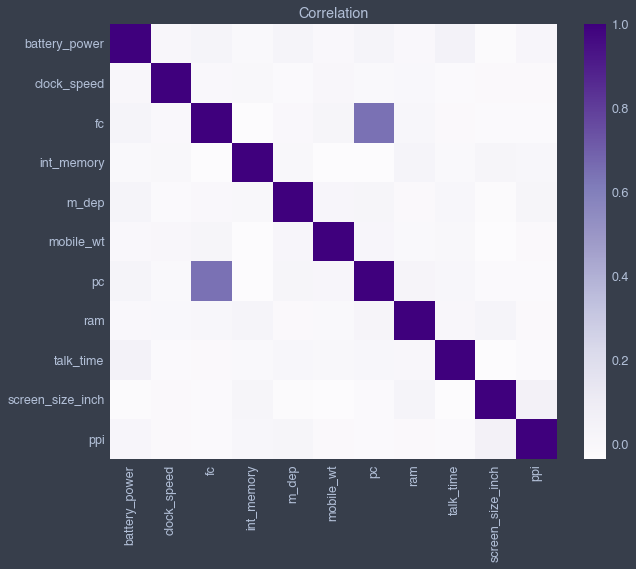

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='onedork')

corr=train_data.corr()
fig = plt.figure(figsize=(10,8))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation")

As we can see our target price range has highly positive correlation between ram. 

Also 

* 3G and 4G
* pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
* px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
* sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)

features have highly positive correlation. For example 	as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.


Now lets see correlation values price range and other features.

In [17]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,talk_time,screen_size_inch,ppi
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,0.031441,-0.000653,0.052510,-0.024589,0.018442
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005245,0.003443,-0.011432,-0.006103,-0.009854
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,0.644595,0.015099,-0.006829,-0.011437,-0.012337
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.033273,0.032813,-0.002790,0.022887,0.015263
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,0.026282,-0.009434,0.017003,-0.021453,0.025138
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,0.018844,-0.002581,0.006209,-0.026375,-0.006036
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,1.000000,0.028984,0.014657,-0.013611,-0.017451
ram,-0.000653,0.003443,0.015099,0.032813,-0.009434,-0.002581,0.028984,1.000000,0.010820,0.033335,-0.006357
talk_time,0.052510,-0.011432,-0.006829,-0.002790,0.017003,0.006209,0.014657,0.010820,1.000000,-0.026502,-0.010729
screen_size_inch,-0.024589,-0.006103,-0.011437,0.022887,-0.021453,-0.026375,-0.013611,0.033335,-0.026502,1.000000,0.057003


In [18]:
#price range correlation
# corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

Price range and RAM have about 0.91 correlation. Because of that I compared ram and other features with price range with Altair, Seaborn and Plotly libraries.

The Correlation isn't between 2 continous variables. It's between a Catgorical and Continous variables.
The **'point biserial correlation'** gives the correlation between a categorical and continous variables.
The corr() Functionality does this internally

**Correlation Charts in Corr Functionality**
- Continous to Continous -> Pearson Correlation
- Discrete to Discrete -> Chi-Squared Test
- Discrete to Continous 
    * If target consists of 2-classes = Point Biseral Correlation
    * If target consists of multiple-classes = One-way ANOVA

In [19]:
train_data.dtypes

battery_power          int64
blue                category
clock_speed          float64
dual_sim            category
fc                     int64
four_g              category
int_memory             int64
m_dep                float64
mobile_wt              int64
n_cores             category
pc                     int64
ram                    int64
talk_time              int64
three_g             category
touch_screen        category
wifi                category
price_range         category
screen_size_inch       int64
ppi                    int64
dtype: object

In [20]:
#price range correlation
# corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

# 3(f) Exploratory Analysis through Visualizations ->

# Dealt in a seperate notebook

---
## Standaridization

In [21]:
from sklearn import preprocessing

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaler.fit(train_data[continous_cols])

train_tmp = scaler.transform(train_data[continous_cols]) #Transforming the Train Data
test_tmp = scaler.transform(test_data[continous_cols]) #Transforming the Test Data

scaled_train_num = pd.DataFrame(train_tmp, columns=continous_cols)
scaled_test_num = pd.DataFrame(test_tmp, columns=continous_cols)

non_num_cols = categorical_cols
non_num_cols.append(target_col)
# scaled_df = scaled_df.join(train_data[non_num_cols])

train_data_std = pd.concat([scaled_train_num, train_data[non_num_cols]], axis=1, join="inner")
test_data_std = pd.concat([scaled_test_num, test_data[non_num_cols]], axis=1, join="inner")

In [22]:
train_data_std

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,talk_time,screen_size_inch,ppi,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi,price_range
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.305750,0.391703,1.462493,-0.224686,-1.073033,0,0,0,2,0,0,1,1
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.645989,0.467317,-0.734267,-0.380926,1.077541,1,1,1,3,1,1,0,2
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,-0.645989,0.441498,-0.368140,-0.758506,1.521355,1,1,1,5,1,1,0,2
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,-0.151168,0.594569,-0.002014,0.621614,1.526741,1,0,0,6,1,0,0,2
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,0.673534,-0.657666,0.730240,-0.836626,0.673657,1,0,1,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,-1.253064,-0.992890,-1.656260,1.034357,-0.967737,0.673534,-1.342799,1.462493,-0.367906,1.692859,1,1,1,6,1,1,0,0
1996,1.653694,1.321096,-0.992890,0.383299,-1.046495,1.320993,-1.140810,-0.085031,0.913303,0.387254,1.076137,1,1,0,4,1,1,1,2
1997,1.530773,-0.762748,-0.762495,0.217930,0.687548,-0.911225,-1.140810,0.860139,-1.100394,-0.927766,0.616374,0,1,1,8,1,1,0,3
1998,0.622527,-0.762748,-0.071307,0.769162,-1.393304,0.134244,-0.810929,-1.157454,1.462493,1.298653,-0.819885,0,0,1,5,1,1,1,0


In [23]:
train_data_std.dtypes

battery_power        float64
clock_speed          float64
fc                   float64
int_memory           float64
m_dep                float64
mobile_wt            float64
pc                   float64
ram                  float64
talk_time            float64
screen_size_inch     float64
ppi                  float64
blue                category
dual_sim            category
four_g              category
n_cores             category
three_g             category
touch_screen        category
wifi                category
price_range         category
dtype: object

In [24]:
test_data_std

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,talk_time,screen_size_inch,ppi,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi,price_range
0,-0.445060,0.340463,2.232650,-1.490890,-1.393304,1.490528,1.003414,1.246506,-1.649584,0.048734,-0.706581,1,1,0,3,0,1,0,3
1,-0.904874,-1.253064,-0.071307,1.596010,1.034357,1.434017,0.343653,1.632873,-0.734267,-1.044946,-0.320579,1,1,1,5,1,0,0,3
2,1.294038,1.566254,-0.762495,-0.278179,1.381165,1.292737,-0.975869,0.250619,-0.185077,1.168453,1.000006,1,0,0,3,0,1,1,2
3,0.699922,-1.253064,3.154233,-0.388426,-0.006069,-1.250297,1.663176,1.631029,-0.734267,-1.044946,-0.468227,0,1,1,8,1,1,0,3
4,0.444976,-0.149853,1.541463,0.934531,-0.006069,-0.911225,1.333295,-0.323860,-0.734267,0.517454,-0.359916,0,0,1,6,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.050473,0.463042,-0.992890,1.210147,-0.006069,0.840642,1.168355,-0.002963,0.730240,0.413294,-0.382480,1,0,1,7,1,1,0,2
996,-1.432976,0.340463,-0.992890,-1.049904,1.381165,1.292737,-1.305750,-0.176321,1.462493,-0.940786,1.175093,0,1,0,4,0,1,1,1
997,-0.121824,-0.149853,-0.762495,-1.325520,-0.006069,-1.702391,0.343653,-0.831024,0.547176,-1.044946,-0.616879,0,0,1,1,1,0,0,0
998,0.670330,-1.253064,-0.992890,0.989655,-0.352878,0.868898,0.343653,0.354819,-0.917331,1.103353,-1.053148,1,1,0,2,0,1,0,2


In [25]:
test_data_std.dtypes

battery_power        float64
clock_speed          float64
fc                   float64
int_memory           float64
m_dep                float64
mobile_wt            float64
pc                   float64
ram                  float64
talk_time            float64
screen_size_inch     float64
ppi                  float64
blue                category
dual_sim            category
four_g              category
n_cores             category
three_g             category
touch_screen        category
wifi                category
price_range         category
dtype: object

---
## Dummification

In [26]:
train_data_std

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,talk_time,screen_size_inch,ppi,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi,price_range
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.305750,0.391703,1.462493,-0.224686,-1.073033,0,0,0,2,0,0,1,1
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.645989,0.467317,-0.734267,-0.380926,1.077541,1,1,1,3,1,1,0,2
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,-0.645989,0.441498,-0.368140,-0.758506,1.521355,1,1,1,5,1,1,0,2
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,-0.151168,0.594569,-0.002014,0.621614,1.526741,1,0,0,6,1,0,0,2
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,0.673534,-0.657666,0.730240,-0.836626,0.673657,1,0,1,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,-1.253064,-0.992890,-1.656260,1.034357,-0.967737,0.673534,-1.342799,1.462493,-0.367906,1.692859,1,1,1,6,1,1,0,0
1996,1.653694,1.321096,-0.992890,0.383299,-1.046495,1.320993,-1.140810,-0.085031,0.913303,0.387254,1.076137,1,1,0,4,1,1,1,2
1997,1.530773,-0.762748,-0.762495,0.217930,0.687548,-0.911225,-1.140810,0.860139,-1.100394,-0.927766,0.616374,0,1,1,8,1,1,0,3
1998,0.622527,-0.762748,-0.071307,0.769162,-1.393304,0.134244,-0.810929,-1.157454,1.462493,1.298653,-0.819885,0,0,1,5,1,1,1,0


In [27]:
xtr = pd.get_dummies(train_data_std.loc[:, train_data_std.columns != 'price_range'], drop_first=True)
ytr = train_data[['price_range']]
xte = pd.get_dummies(test_data_std.loc[:, test_data_std.columns != 'price_range'], drop_first=True)
yte = test_data[['price_range']]

In [28]:
train_dummy = xtr.join(ytr)
test_dummy = xte.join(yte)

In [29]:
train_dummy.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,talk_time,screen_size_inch,ppi,blue_1,dual_sim_1,four_g_1,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,three_g_1,touch_screen_1,wifi_1,price_range
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.305750,0.391703,1.462493,-0.224686,-1.073033,0,0,0,1,0,0,0,0,0,0,0,0,1,1
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.645989,0.467317,-0.734267,-0.380926,1.077541,1,1,1,0,1,0,0,0,0,0,1,1,0,2
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,-0.645989,0.441498,-0.368140,-0.758506,1.521355,1,1,1,0,0,0,1,0,0,0,1,1,0,2
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,-0.151168,0.594569,-0.002014,0.621614,1.526741,1,0,0,0,0,0,0,1,0,0,1,0,0,2
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,0.673534,-0.657666,0.730240,-0.836626,0.673657,1,0,1,1,0,0,0,0,0,0,1,1,0,1


In [30]:
train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   battery_power     2000 non-null   float64 
 1   clock_speed       2000 non-null   float64 
 2   fc                2000 non-null   float64 
 3   int_memory        2000 non-null   float64 
 4   m_dep             2000 non-null   float64 
 5   mobile_wt         2000 non-null   float64 
 6   pc                2000 non-null   float64 
 7   ram               2000 non-null   float64 
 8   talk_time         2000 non-null   float64 
 9   screen_size_inch  2000 non-null   float64 
 10  ppi               2000 non-null   float64 
 11  blue_1            2000 non-null   uint8   
 12  dual_sim_1        2000 non-null   uint8   
 13  four_g_1          2000 non-null   uint8   
 14  n_cores_2         2000 non-null   uint8   
 15  n_cores_3         2000 non-null   uint8   
 16  n_cores_4         2000 n

In [31]:
test_dummy.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,talk_time,screen_size_inch,ppi,blue_1,dual_sim_1,four_g_1,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,three_g_1,touch_screen_1,wifi_1,price_range
0,-0.445060,0.340463,2.232650,-1.490890,-1.393304,1.490528,1.003414,1.246506,-1.649584,0.048734,-0.706581,1,1,0,0,1,0,0,0,0,0,0,1,0,3
1,-0.904874,-1.253064,-0.071307,1.596010,1.034357,1.434017,0.343653,1.632873,-0.734267,-1.044946,-0.320579,1,1,1,0,0,0,1,0,0,0,1,0,0,3
2,1.294038,1.566254,-0.762495,-0.278179,1.381165,1.292737,-0.975869,0.250619,-0.185077,1.168453,1.000006,1,0,0,0,1,0,0,0,0,0,0,1,1,2
3,0.699922,-1.253064,3.154233,-0.388426,-0.006069,-1.250297,1.663176,1.631029,-0.734267,-1.044946,-0.468227,0,1,1,0,0,0,0,0,0,1,1,1,0,3
4,0.444976,-0.149853,1.541463,0.934531,-0.006069,-0.911225,1.333295,-0.323860,-0.734267,0.517454,-0.359916,0,0,1,0,0,0,0,1,0,0,1,0,1,1


In [32]:
test_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   battery_power     1000 non-null   float64 
 1   clock_speed       1000 non-null   float64 
 2   fc                1000 non-null   float64 
 3   int_memory        1000 non-null   float64 
 4   m_dep             1000 non-null   float64 
 5   mobile_wt         1000 non-null   float64 
 6   pc                1000 non-null   float64 
 7   ram               1000 non-null   float64 
 8   talk_time         1000 non-null   float64 
 9   screen_size_inch  1000 non-null   float64 
 10  ppi               1000 non-null   float64 
 11  blue_1            1000 non-null   uint8   
 12  dual_sim_1        1000 non-null   uint8   
 13  four_g_1          1000 non-null   uint8   
 14  n_cores_2         1000 non-null   uint8   
 15  n_cores_3         1000 non-null   uint8   
 16  n_cores_4         1000 no

---
## Data Split for Modelling

In [33]:
X_train = train_dummy.loc[:, train_dummy.columns!='price_range']
y_train = train_dummy[target_col]
X_test = test_dummy.loc[:, test_dummy.columns!='price_range']
y_test = test_dummy[target_col]

In [34]:
X_train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,talk_time,screen_size_inch,ppi,blue_1,dual_sim_1,four_g_1,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,three_g_1,touch_screen_1,wifi_1
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.305750,0.391703,1.462493,-0.224686,-1.073033,0,0,0,1,0,0,0,0,0,0,0,0,1
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.645989,0.467317,-0.734267,-0.380926,1.077541,1,1,1,0,1,0,0,0,0,0,1,1,0
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,-0.645989,0.441498,-0.368140,-0.758506,1.521355,1,1,1,0,0,0,1,0,0,0,1,1,0
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,-0.151168,0.594569,-0.002014,0.621614,1.526741,1,0,0,0,0,0,0,1,0,0,1,0,0
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,0.673534,-0.657666,0.730240,-0.836626,0.673657,1,0,1,1,0,0,0,0,0,0,1,1,0


In [35]:
X_test.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,talk_time,screen_size_inch,ppi,blue_1,dual_sim_1,four_g_1,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,three_g_1,touch_screen_1,wifi_1
0,-0.445060,0.340463,2.232650,-1.490890,-1.393304,1.490528,1.003414,1.246506,-1.649584,0.048734,-0.706581,1,1,0,0,1,0,0,0,0,0,0,1,0
1,-0.904874,-1.253064,-0.071307,1.596010,1.034357,1.434017,0.343653,1.632873,-0.734267,-1.044946,-0.320579,1,1,1,0,0,0,1,0,0,0,1,0,0
2,1.294038,1.566254,-0.762495,-0.278179,1.381165,1.292737,-0.975869,0.250619,-0.185077,1.168453,1.000006,1,0,0,0,1,0,0,0,0,0,0,1,1
3,0.699922,-1.253064,3.154233,-0.388426,-0.006069,-1.250297,1.663176,1.631029,-0.734267,-1.044946,-0.468227,0,1,1,0,0,0,0,0,0,1,1,1,0
4,0.444976,-0.149853,1.541463,0.934531,-0.006069,-0.911225,1.333295,-0.323860,-0.734267,0.517454,-0.359916,0,0,1,0,0,0,0,1,0,0,1,0,1


---
---
# Modelling

---
## Logistic Regression

In [36]:
# #importing the Logistic regression module
# from sklearn.linear_model import LogisticRegression

# # Building the model
# model = LogisticRegression(max_iter=5000)

# # Fitting the model
# model = model.fit(X_train,y_train)

In [37]:
# load the model from disk
model = pickle.load(open("models/logistic.sav", 'rb'))

# Prediction
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [38]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_train, y_pred=train_preds)

array([[488,  12,   0,   0],
       [ 15, 470,  15,   0],
       [  0,  21, 456,  23],
       [  0,   0,  15, 485]])

In [39]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)

print("Training Accuracy is :", train_acc)
print("Testing Accuracy is :", test_acc)

Training Accuracy is : 0.9495
Testing Accuracy is : 0.928


In [40]:
# pickle.dump(model, open("models/logistic.sav", 'wb'))

---
## Naive Bayes

In [41]:
# #importing the Logistic regression module
# from sklearn.naive_bayes import GaussianNB

# # Building the model
# model = GaussianNB()

# # Fitting the model
# model = model.fit(X_train,y_train)

In [42]:
# load the model from disk
model = pickle.load(open("models/nb.sav", 'rb'))

# Prediction
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [43]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_train, y_pred=train_preds)

array([[444,  54,   2,   0],
       [ 50, 362,  88,   0],
       [  0,  86, 355,  59],
       [  0,   2,  60, 438]])

In [44]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)

print("Training Accuracy is :", train_acc)
print("Testing Accuracy is :", test_acc)

Training Accuracy is : 0.7995
Testing Accuracy is : 0.787


In [45]:
# pickle.dump(model, open("models/nb.sav", 'wb'))

---
## Regularization

In [46]:
# # Ridge Regularization
# from sklearn import linear_model

# # Building the model
# model = linear_model.RidgeClassifier(alpha=0.1, fit_intercept=True)

# # Fitting the model
# model = model.fit(X_train,y_train)

In [47]:
# load the model from disk
model = pickle.load(open("models/ridge.sav", 'rb'))

# Prediction
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [48]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_train, y_pred=train_preds)

array([[500,   0,   0,   0],
       [359,  95,  39,   7],
       [  6,  31, 122, 341],
       [  0,   0,   0, 500]])

In [49]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)

print("Training Accuracy is :", train_acc)
print("Testing Accuracy is :", test_acc)

Training Accuracy is : 0.6085
Testing Accuracy is : 0.612


In [50]:
# pickle.dump(model, open("models/ridge.sav", 'wb'))

---
## KNN

In [51]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Finding out the best K-Value
k = []
tr_accs=[]
te_accs=[]
tr_error_rate = []
te_error_rate = []

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model = model.fit(X_train,y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
    test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)
    
    k.append(i)
    tr_accs.append(np.mean(train_preds == y_train))
    te_accs.append(np.mean(test_preds == y_test))
    tr_error_rate.append(np.mean(train_preds != y_train))
    te_error_rate.append(np.mean(test_preds != y_test))

No handles with labels found to put in legend.


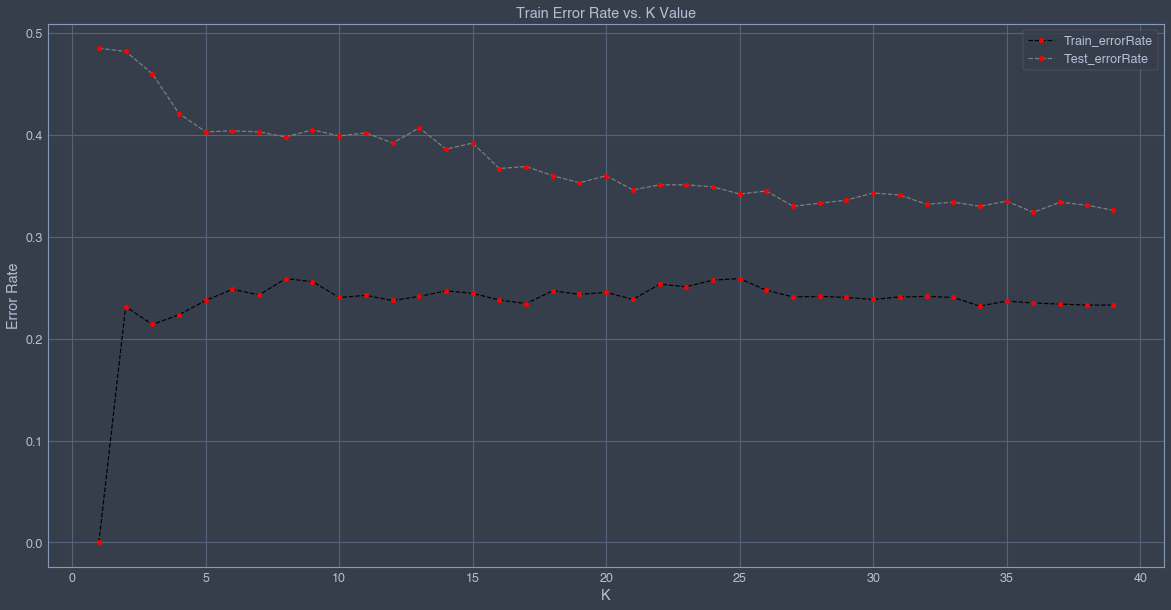

In [52]:
plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.plot(range(1,40),tr_error_rate,color='black', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.plot(range(1,40),te_error_rate,color='grey', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.gca().legend(('Train_errorRate','Test_errorRate'))
ax.legend(loc='best')
plt.title('Train Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [53]:
knn_metric_df=pd.DataFrame({'k':k,'Train_accs':tr_accs, 'Test_accs':te_accs,
                              'diff_abs_accs':list(np.abs(np.array(tr_accs)-np.array(te_accs))),
                              'Train_errorRate':tr_error_rate, 'Test_errorRate':te_error_rate,
                              'diff_abs_errorRate':list(np.abs(np.array(tr_error_rate)-np.array(te_error_rate)))})
knn_metric_df

,k,Train_accs,Test_accs,diff_abs_accs,Train_errorRate,Test_errorRate,diff_abs_errorRate
0,1,1.0000,0.515,0.4850,0.0000,0.485,0.4850
1,2,0.7685,0.518,0.2505,0.2315,0.482,0.2505
2,3,0.7860,0.540,0.2460,0.2140,0.460,0.2460
3,4,0.7765,0.579,0.1975,0.2235,0.421,0.1975
4,5,0.7625,0.597,0.1655,0.2375,0.403,0.1655
5,6,0.7515,0.596,0.1555,0.2485,0.404,0.1555
6,7,0.7570,0.597,0.1600,0.2430,0.403,0.1600
7,8,0.7410,0.602,0.1390,0.2590,0.398,0.1390
8,9,0.7440,0.595,0.1490,0.2560,0.405,0.1490
9,10,0.7595,0.601,0.1585,0.2405,0.399,0.1585


In [54]:
q=min(knn_metric_df['diff_abs_accs'])
print("least value is ",q)
knn_metric_df[knn_metric_df.values == q]

least value is  0.08299999999999996


,k,Train_accs,Test_accs,diff_abs_accs,Train_errorRate,Test_errorRate,diff_abs_errorRate
24,25,0.741,0.658,0.083,0.259,0.342,0.083


---
## Building the final Knn-Model

In [55]:
# # Building the model
# model = KNeighborsClassifier(n_neighbors=25)

# # Fitting the model
# model = model.fit(X_train,y_train)

In [56]:
# load the model from disk
model = pickle.load(open("models/knn11.sav", 'rb'))

# Prediction
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [57]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_train, y_pred=train_preds)

array([[434,  65,   1,   0],
       [ 81, 346,  70,   3],
       [  3, 123, 324,  50],
       [  0,   6, 116, 378]])

In [58]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)

print("Training Accuracy is :", train_acc)
print("Testing Accuracy is :", test_acc)

Training Accuracy is : 0.741
Testing Accuracy is : 0.658


In [59]:
pickle.dump(model, open("models/knn11.sav", 'wb'))

---
## Decision Trees

In [60]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

# Building the model
model = DecisionTreeClassifier()

# Fitting the model
model = model.fit(X_train,y_train)

# Prediction
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [61]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_train, y_pred=train_preds)

array([[500,   0,   0,   0],
       [  0, 500,   0,   0],
       [  0,   0, 500,   0],
       [  0,   0,   0, 500]])

In [62]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)

print("Training Accuracy is :", train_acc)
print("Testing Accuracy is :", test_acc)

Training Accuracy is : 1.0
Testing Accuracy is : 0.862


In [63]:
# HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
param_dict = dict({'criterion':['gini','entropy'], 'max_depth':range(0,20),
                   'min_samples_split':range(1,10), 'min_samples_leaf':range(1,5)})

grid = GridSearchCV(model, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 1440 candidates, totalling 14400 fits


/Users/tarunwuyyuru/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan ... 0.873  0.8705 0.8695]
  category=UserWarning


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 20),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [64]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [65]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=5)

In [66]:
grid.best_score_

0.875

---
### Building the final decision tree model

In [67]:
# # Building the model
# model = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=4, min_samples_leaf=4)

# # Fitting the model
# model = model.fit(X_train,y_train)

In [68]:
# load the model from disk
model = pickle.load(open("models/dt_final.sav", 'rb'))

# Prediction
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### Visualizing the final decision tree

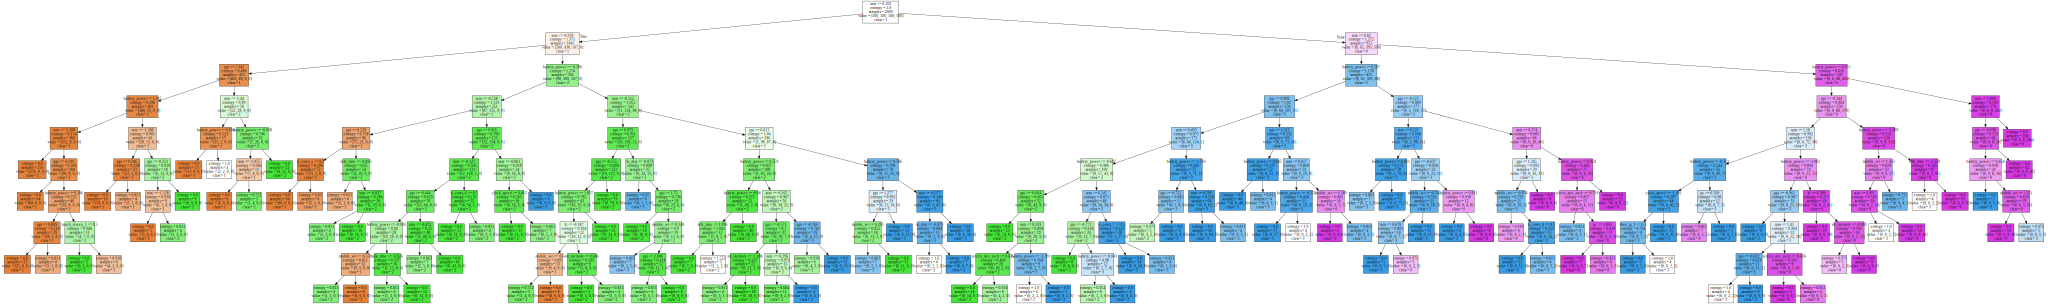

In [69]:
import graphviz
from sklearn import tree

xtr_dummy_cols = list(train_dummy.columns)
xtr_dummy_cols.remove('price_range')

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=xtr_dummy_cols,  
                                class_names=[str(i) for i in train_data['price_range'].unique()],
                                filled=True, )

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [70]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_train, y_pred=train_preds)

array([[490,  10,   0,   0],
       [  8, 484,   8,   0],
       [  0,  22, 468,  10],
       [  0,   0,  18, 482]])

In [71]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)

print("Training Accuracy is :", train_acc)
print("Testing Accuracy is :", test_acc)

Training Accuracy is : 0.962
Testing Accuracy is : 0.875


In [72]:
# pickle.dump(model, open("models/dt_final.sav", 'wb'))

---
## SVM

In [73]:
# SVM
from sklearn.svm import SVC

# Building the model
model = SVC()

# Fitting the model
model.fit(X_train,y_train)

# Prediction
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [74]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_train, y_pred=train_preds)

array([[493,   7,   0,   0],
       [  6, 489,   5,   0],
       [  0,   8, 486,   6],
       [  0,   0,   9, 491]])

In [75]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)

print("Training Accuracy is :", train_acc)
print("Testing Accuracy is :", test_acc)

Training Accuracy is : 0.9795
Testing Accuracy is : 0.895


In [76]:
# HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly','rbf']}
  
# fitting the model for grid search
grid = GridSearchCV(SVC(), param_grid, refit = True, cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly', 'rbf']},
             verbose=1)

In [77]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [78]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [79]:
grid.best_score_

0.929

---
### Building the final SVM model

In [80]:
# # Building the model
# model = SVC(C= 1000, gamma= 0.001, kernel= 'rbf')

# # Fitting the model
# model = model.fit(X_train,y_train)

In [81]:
# load the model from disk
model = pickle.load(open("models/svm_final.sav", 'rb'))

# Prediction
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [82]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_train, y_pred=train_preds)

array([[493,   7,   0,   0],
       [ 13, 478,   9,   0],
       [  0,  15, 468,  17],
       [  0,   0,  11, 489]])

In [83]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)

print("Training Accuracy is :", train_acc)
print("Testing Accuracy is :", test_acc)

Training Accuracy is : 0.964
Testing Accuracy is : 0.927


In [84]:
# pickle.dump(model, open("models/svm_final.sav", 'wb'))

---
# Ensembles - Random Forest

In [85]:
# Hyper Parameter tuning the Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

# RandomForest Hyper Parameter Tuned Model
model = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [86]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_split=5, n_estimators=600)

In [87]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [88]:
rf_random.best_score_

0.8655004329666998

---
### Building the final Random Forest model

In [89]:
# # Building the model
# model = RandomForestClassifier(n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features='auto',
#                               max_depth=100, bootstrap=True)

# model = model.fit(X_train,y_train)

In [90]:
# load the model from disk
model = pickle.load(open("models/rf_final.sav", 'rb'))

# Prediction
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [91]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_train, y_pred=train_preds)

array([[500,   0,   0,   0],
       [  0, 500,   0,   0],
       [  0,   0, 500,   0],
       [  0,   0,   0, 500]])

In [92]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)

print("Training Accuracy is :", train_acc)
print("Testing Accuracy is :", test_acc)

Training Accuracy is : 1.0
Testing Accuracy is : 0.899


In [93]:
# pickle.dump(model, open("models/rf_final.sav", 'wb'))

---
## Best Features Extracted for predicting the Model

### 1) Using Random Forest

In [94]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Selector Features
sel = SelectFromModel(RandomForestClassifier(n_estimators=800, min_samples_split=2, 
                                             min_samples_leaf=1, max_features='auto',
                                             max_depth=100, bootstrap=True))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=100,
                                                 n_estimators=800))

In [95]:
print(sel.get_support())

[ True False False  True False  True False  True False  True  True False
 False False False False False False False False False False False False]


In [96]:
selected_feat_rf= list(X_train.columns[sel.get_support()])
selected_feat_rf

['battery_power', 'int_memory', 'mobile_wt', 'ram', 'screen_size_inch', 'ppi']

### 2) Using RFE

In [97]:
from sklearn.feature_selection import RFE

# Running RFE with the output number of the variable equal to 9
rfe = RFE(model, 6)
rfe = rfe.fit(X_train, y_train)

/Users/tarunwuyyuru/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [98]:
# print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ 1  4  5  1  6  1  3  1  2  1  1 10  9  7 19 15 16 13 18 14 17 12  8 11]


In [99]:
rfe_cols = list(X_train.columns[rfe.support_])
rfe_cols

['battery_power', 'int_memory', 'mobile_wt', 'ram', 'screen_size_inch', 'ppi']

# Selection of Best Features

In [100]:
# From Random Forest
selected_feat_rf

['battery_power', 'int_memory', 'mobile_wt', 'ram', 'screen_size_inch', 'ppi']

In [101]:
# From RFE
rfe_cols

['battery_power', 'int_memory', 'mobile_wt', 'ram', 'screen_size_inch', 'ppi']

- Note:
So, Finally we build a model with these best features

---
# Models Evaluation

In [102]:
def model_evaluation_output(modelObject):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc
    
    # Prediction
    train_preds = modelObject.predict(X_train)
    test_preds = modelObject.predict(X_test)
    
    # Gathering Results
    tr_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
    tr_prec = precision_score(y_true=y_train, y_pred=train_preds,average='macro')
    tr_rec = recall_score(y_true=y_train, y_pred=train_preds,average='macro')
    tr_f1 = f1_score(y_true=y_train, y_pred=train_preds,average='macro')
    
    te_acc = accuracy_score(y_true=y_test, y_pred=test_preds)
    te_prec = precision_score(y_true=y_test, y_pred=test_preds,average='macro')
    te_rec = recall_score(y_true=y_test, y_pred=test_preds,average='macro')
    te_f1 = f1_score(y_true=y_test, y_pred=test_preds,average='macro')
    
    acc_diff = np.abs(tr_acc-te_acc)
    prec_diff = np.abs(tr_prec-te_prec)
    rec_diff = np.abs(tr_rec-te_rec)
    f1_diff = np.abs(tr_f1-te_f1)
    
    return [tr_acc,te_acc,acc_diff,tr_prec,te_prec,prec_diff,tr_rec,te_rec,rec_diff,tr_f1,te_f1,f1_diff]

In [103]:
lr = pickle.load(open("models/logistic.sav", 'rb'))
nb = pickle.load(open("models/nb.sav", 'rb'))
knn = pickle.load(open("models/knn11.sav", 'rb'))
ridge = pickle.load(open("models/ridge.sav", 'rb'))
dt = pickle.load(open("models/dt_final.sav", 'rb'))
svm = pickle.load(open("models/svm_final.sav", 'rb'))
rf = pickle.load(open("models/rf_final.sav", 'rb'))

In [104]:
# Evaluation
models = dict({'Logistic_Regression':lr, 'Naive_Bayes':nb, 'KNN':knn, 
               'Ridge_Regularization':ridge, 'Decision_Trees':dt, 'svm':svm, 
               'Random_Forest':rf})
modelop = dict({})

for i in models.keys():
    modelop[i] = model_evaluation_output(modelObject=models[i])

In [105]:
modelop

{'Logistic_Regression': [0.9495,
  0.928,
  0.021499999999999964,
  0.9493921447498542,
  0.92821377462737,
  0.021178370122484247,
  0.9495,
  0.9273313584810912,
  0.02216864151890885,
  0.9493800174462927,
  0.9273582209269449,
  0.02202179651934788],
 'Naive_Bayes': [0.7995,
  0.787,
  0.012499999999999956,
  0.8003243541857588,
  0.7880404284389793,
  0.0122839257467795,
  0.7995,
  0.784265600709451,
  0.015234399290549039,
  0.799894817057278,
  0.7856456029126772,
  0.014249214144600897],
 'KNN': [0.741,
  0.658,
  0.08299999999999996,
  0.7474149054044485,
  0.6654924924349521,
  0.08192241296949643,
  0.7410000000000001,
  0.6548450212888716,
  0.08615497871112854,
  0.7427541262001879,
  0.6572216063794816,
  0.08553251982070631],
 'Ridge_Regularization': [0.6085,
  0.612,
  0.0034999999999999476,
  0.669847388178473,
  0.6749164521177242,
  0.005069063939251217,
  0.6085,
  0.5960177523011747,
  0.012482247698825333,
  0.5367731356013714,
  0.5268277711381069,
  0.009945364

In [106]:
final_eval_df = pd.DataFrame(columns=['TRAIN_ACC','TEST_ACC','acc_diff','TRAIN_PREC','TEST_PREC','prec_diff',
                                      'TRAIN_REC','TEST_REC','rec_diff','TRAIN_F1','TEST_F1','f1_diff'], index=modelop.keys())

# Filling in the values
for i in modelop.keys():
    final_eval_df.loc[i,]=modelop[i]

In [107]:
final_eval_df

,TRAIN_ACC,TEST_ACC,acc_diff,TRAIN_PREC,TEST_PREC,prec_diff,TRAIN_REC,TEST_REC,rec_diff,TRAIN_F1,TEST_F1,f1_diff
Logistic_Regression,0.9495,0.928,0.0215,0.949392,0.928214,0.021178,0.9495,0.927331,0.022169,0.94938,0.927358,0.022022
Naive_Bayes,0.7995,0.787,0.0125,0.800324,0.78804,0.012284,0.7995,0.784266,0.015234,0.799895,0.785646,0.014249
KNN,0.741,0.658,0.083,0.747415,0.665492,0.081922,0.741,0.654845,0.086155,0.742754,0.657222,0.085533
Ridge_Regularization,0.6085,0.612,0.0035,0.669847,0.674916,0.005069,0.6085,0.596018,0.012482,0.536773,0.526828,0.009945
Decision_Trees,0.962,0.875,0.087,0.962241,0.873979,0.088262,0.962,0.873589,0.088411,0.962036,0.873668,0.088368
svm,0.964,0.927,0.037,0.963932,0.928,0.035932,0.964,0.926727,0.037273,0.963914,0.926529,0.037385
Random_Forest,1.0,0.899,0.101,1.0,0.897487,0.102513,1.0,0.8975,0.1025,1.0,0.897435,0.102565


---
## Building the final Model using Selected Features

---
## Logistic Regression

In [108]:
refined_train = X_train[rfe_cols]
refined_test = X_test[rfe_cols]

In [109]:
#importing the Logistic regression module
from sklearn.linear_model import LogisticRegression

# Building the model
model = LogisticRegression()

# Fitting the model
model = model.fit(refined_train,y_train)

In [110]:
# Prediction
train_preds = model.predict(refined_train)
test_preds = model.predict(refined_test)

In [111]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_train, y_pred=train_preds)

array([[487,  13,   0,   0],
       [ 12, 470,  18,   0],
       [  0,  25, 448,  27],
       [  0,   0,  21, 479]])

In [112]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)

print("Training Accuracy is :", train_acc)
print("Testing Accuracy is :", test_acc)

Training Accuracy is : 0.942
Testing Accuracy is : 0.931


---
### Building the final SVM model (with Selected Features)

In [113]:
# Building the model
model = SVC(C= 1000, gamma= 0.001, kernel= 'rbf')

# Fitting the model
model = model.fit(refined_train,y_train)

In [114]:
# Prediction
train_preds = model.predict(refined_train)
test_preds = model.predict(refined_test)

In [115]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_train, y_pred=train_preds)

array([[489,  11,   0,   0],
       [ 11, 473,  16,   0],
       [  0,  20, 461,  19],
       [  0,   0,  16, 484]])

In [116]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_preds)
test_acc = accuracy_score(y_true=y_test, y_pred=test_preds)

print("Training Accuracy is :", train_acc)
print("Testing Accuracy is :", test_acc)

Training Accuracy is : 0.9535
Testing Accuracy is : 0.932


---
# Final Selection of the Model for Deployment

For the models built normally,
- By looking at the results, we can see that the KNN considering 11 nearest neighbors outperformed every other model by having
the least difference between the train and test metrics
- SVM stands at second position, with the next best set of metrics
- Random Forest offers a third position with more complexity involved in the process

For the models built with 
- 'Standardization' applied to the numeric columns
- 'Dummification' applied to the categorical columns

-> Most of the models (Logistic Regression, KNN, Decision Trees, SVM, Random Forest) performed better, but there is a chance of improvement

For the models built with
- Feature Engineering
- 'Standardization' applied to the numeric columns
- 'Dummification' applied to the categorical columns

-> Only Logistic Regression and SVM has shown great relaiability w.r.t all the metrics on the Train and Test Data, which
means this combination has worked out the best for this dataset.

* From the RULE OF OCCUM's RAZOR -> Select the model which has 'Minimum complexity' and 'Better accuracy'.

-> After using only the selected Features => Logistic Regression shown the most resilience in tackling new data. We will be choosing 'Logistic Regression' for the model deployment for this dataset.

# ------------------------------------------ ~ GRACIAS ~ ----------------------------------------------